# HW01

## Task 1 

### Part a

Calculate the fraction of these points that are within distance 1 of the origin, giving an
approximation of the volume of the unit hypersphere to the hypercube inscribing it. Plot this fraction as
a function of D (a scatter plot of D versus the fraction). 

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def create_points(num, dim):
    points = []
    for i in range(num):
        points.append(np.random.uniform(low = -1, high = 1, size = dim))
    return points

In [3]:
all_points = []
for i in range(15):
    all_points.append(create_points(num = 1000, dim = i + 1))

In [4]:
fractions = []
for sets in all_points:
    number = 0
    for point in sets:
        dist = 0
        for coordinate in point:
            dist += coordinate ** 2
        if dist <= 1:
            number += 1
    fractions.append(number/1000)

In [5]:
fractions

[1.0,
 0.78,
 0.523,
 0.305,
 0.152,
 0.063,
 0.034,
 0.016,
 0.005,
 0.002,
 0.001,
 0.001,
 0.0,
 0.0,
 0.0]

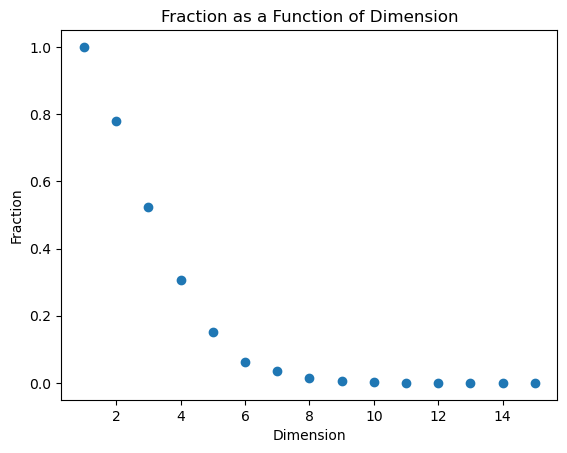

In [6]:
plt.scatter(x = range(1, 16), y = fractions)
plt.title(label = "Fraction as a Function of Dimension")
plt.xlabel("Dimension")
plt.ylabel("Fraction")
plt.show();

### Part b

Use the value of this fraction at D = 2 and D = 3 to get estimates for the value of $\pi$ as you know
the area (for D = 2) and volume (for D = 3) formulae for these cases. 

Since the area of a circle is $\pi$$R^2$, an estimation of the $\pi$ in 2 dimensional space would be the fraction of points which are within the distance of 1 to the origin times 4 because the radius of the circle with diameter as 1 unit is 1/2. 

In [7]:
print(4 * fractions[1])

3.12


Since the volume of a sphere is $\frac{4}{3}$$\pi$$R^3$, an estimation of the $\pi$ in 3 dimensional space would be the fraction of points which are within the distance of 1 to the origin times 6 because the radius of the circle with diameter as 1 unit is 1/2. 

In [8]:
print(6 * fractions[2])

3.138


### Part c

Perform the calculations in part (b) with larger sample sizes. You can use the following set: {5000,
10000, 25000, 50000, 100000}. Visualize the estimated $\pi$ for D = 2 and D = 3 cases. Comment on
your results

In [44]:
number_of_points = [5000, 10000, 25000, 50000, 100000]


set_2d = []
set_3d = []
for i in number_of_points:
    set_2d.append(create_points(num = i , dim = 2))
    set_3d.append(create_points(num = i , dim = 3))

Estimates for $\pi$ in 2 dimensional space:

In [45]:
estimates_2d = []
for sets in set_2d:
    number = 0
    for point in sets:
        dist = 0
        for coordinate in point:
            dist += coordinate ** 2
        if dist <= 1:
            number += 1
    estimates_2d.append(number*4/len(sets))
print(estimates_2d)

[3.0808, 3.1708, 3.13664, 3.14736, 3.14728]


Estimates for $\pi$ in 3 dimensional space:

In [46]:
estimates_3d = []
for sets in set_3d:
    number = 0
    for point in sets:
        dist = 0
        for coordinate in point:
            dist += coordinate ** 2
        if dist <= 1:
            number += 1
    estimates_3d.append(number*6/len(sets))
print(estimates_3d)

[3.1152, 3.1146, 3.1728, 3.13956, 3.1404]


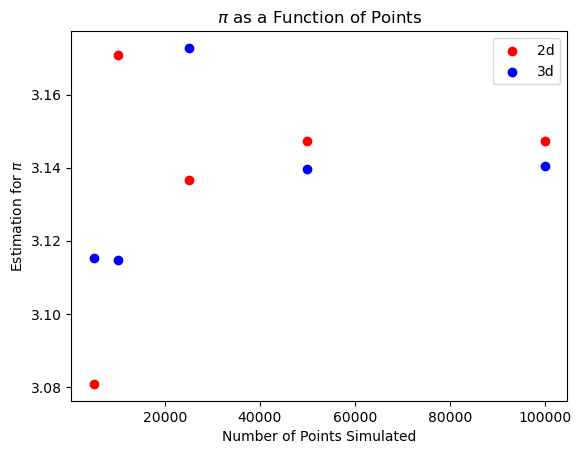

In [47]:
plt.scatter(x = number_of_points, y = estimates_2d, color = "red")
plt.scatter(x = number_of_points, y = estimates_3d, color = "blue")
plt.title(label = "$\pi$ as a Function of Points")
plt.xlabel("Number of Points Simulated")
plt.ylabel("Estimation for $\pi$")
plt.legend(["2d","3d"])
plt.show();

Notice that as the number of points simulated increases, for both dimensions, estimates for $\pi$ get closer and closer to the real value of $\pi$. In addition, notice that the estimations for pi at the small number of points are more accurate in the 3-dimensional simulation than the 2-dimensional simulation. This is simply because there is more information in the 3-dimensional case.

### Part d

Repeat this simulation, sampling 1000 D-dimensional points from 1 to 15 dimensions, where the
value in each dimension is uniformly randomly distributed between -1 and +1. For each value of D,
generate an additional 100 test instances and calculate the distance to each test instance’s nearest
neighbor. Plot the average distance from the test instances to their nearest neighbors as a function of D.

In [44]:
all_points2 = []
additional_points = []
for i in range(15):
    all_points2.append(create_points(num = 1000, dim = i + 1))
    additional_points.append(create_points(num = 100, dim = i + 1))

In [79]:
all_points[9][0][9] 

-0.06449677595821224

In [102]:
def calculate_distances(points, test_points):
    average_distances = []
    for i in range(15):
        avg = []
        for j in range(100):
            average_distance = 0
            for k in range(1000):
                dist = 0
                for c in range(len(points[i][j])):
                    dist += (points[i][k][c] - test_points[i][j][c])**2
                average_distance += dist
            average_distance = average_distance / 1000
            avg.append(average_distance)
        average_distances.append(avg)
    return average_distances

In [103]:
averages = calculate_distances(all_points2, additional_points)

In [107]:
min_averages = []
for a in averages:
    min = a[0]
    for i in range(100):
        if a[i] < min:
            min = a[i]
    min_averages.append(min)        

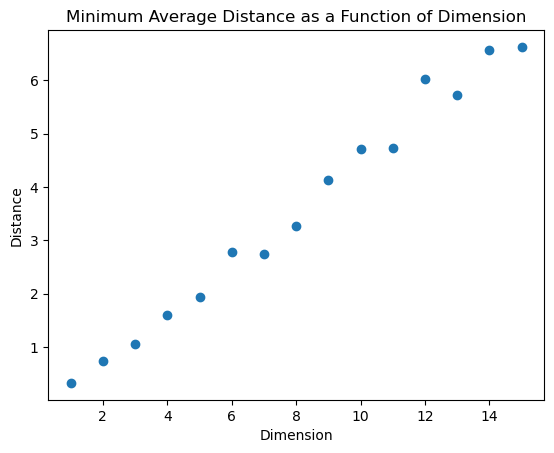

In [109]:
plt.scatter(x = range(1, 16), y = min_averages)
plt.title(label = "Minimum Average Distance as a Function of Dimension")
plt.xlabel("Dimension")
plt.ylabel("Distance")
plt.show();

## Task 2

### Part a 

Read image as a variable in R/Python. You need to install “jpeg” package to read image into a
variable if you use R. For Python, an alternative is to use matplotlib package. What is the structure of
the variable that stores the image? What is the dimension? a. Display the image.

<class 'numpy.ndarray'>
(512, 512, 3)


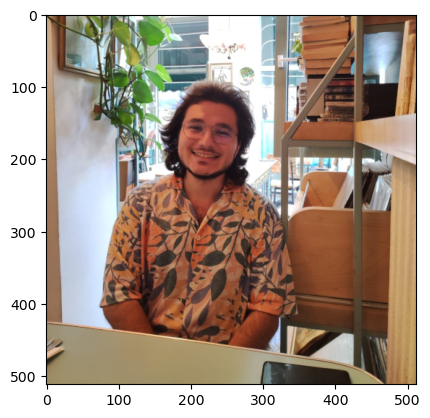

In [67]:
image = mpimg.imread("pic.jpg")
print(type(image))
print(image.shape)
plt.imshow(image)
plt.show();

### Part b

Display each channel as separate image

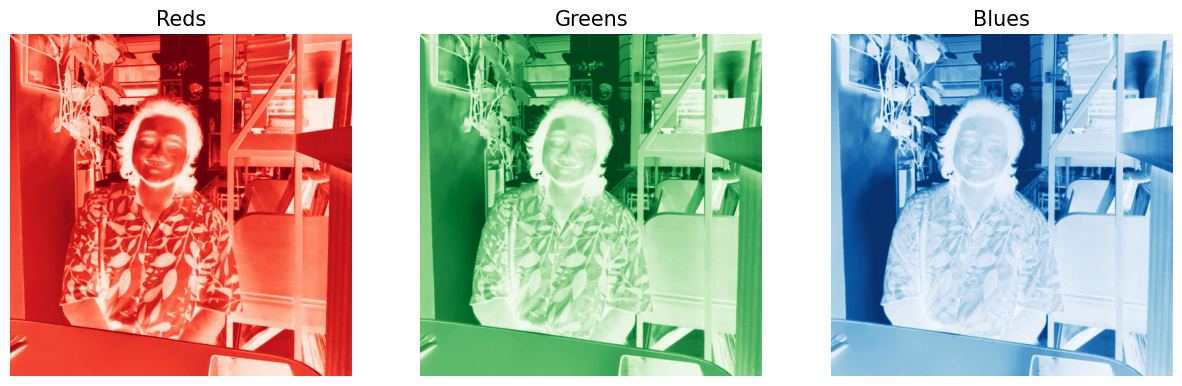

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
colors = ['Reds','Greens','Blues']
for i in range(3):
    ax[i].imshow(image[:,:,i], cmap = colors[i])
    ax[i].set_title(colors[i], fontsize = 15)
    ax[i].axis('off')
plt.show();

### Part c

For each channel, take the average of the columns and plot the average as a line plot for each
channel on a single plot.

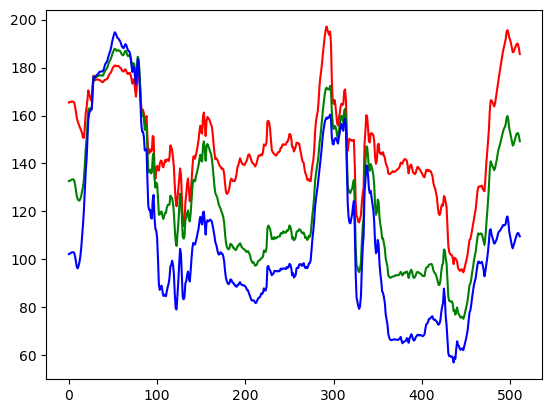

In [107]:
ch_red = image[:,:,0]
ch_green = image[:,:,1]
ch_blue = image[:,:,2]

ch_red_avg = []
ch_green_avg = []
ch_blue_avg = []

for i in range(512):
    ch_red_avg.append(np.mean(ch_red[:,i]))
    ch_green_avg.append(np.mean(ch_green[:,i]))
    ch_blue_avg.append(np.mean(ch_blue[:,i]))
    
plt.plot(ch_red_avg, color = "red")
plt.plot(ch_green_avg, color = "green")
plt.plot(ch_blue_avg, color = "blue")

plt.show();

### Part d

For each channel, subtract one half of the image from the other half (choice of halves is up to you
but dividing the head image vertically into two parts make more sense). If you observe negative pixel
values, you can make them equal to zero. Then:

• Display the new image.

• Display each channel separately as separate image.

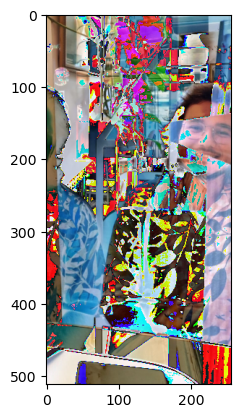

In [119]:
image2 = image[:, :256, :] - image[:, 256:, :]

for i in range(512):
    for j in range(256):
        for k in range(3):
            if image2[i, j , k] < 0:
                image2[i, j, k] = 0

plt.imshow(image2)
plt.show();

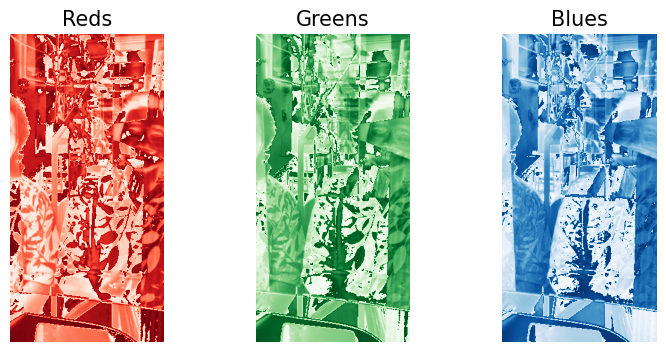

In [128]:
fig, ax = plt.subplots(1, 3, figsize = (9,4), sharey = True)
colors = ['Reds','Greens','Blues']
for i in range(3):
    ax[i].imshow(image2[:,:,i], cmap = colors[i])
    ax[i].set_title(colors[i], fontsize = 15)
    ax[i].axis('off')
plt.show();

### Part e

In order to create a noisy image, add a random noise from uniform distribution with minimum value
of 0 and a maximum value of “0.1 * maximum pixel value observed” to each pixel value for each
channel of original image.

• Display the new image.

• Display each channel separately as separate image.

In [167]:
max_pixels = [np.max(image[:,:,0]), 
              np.max(image[:,:,1]), 
              np.max(image[:,:,2])]
max_pixels

[255, 255, 255]

For all channels, the maximum pixel value observed is 255. Therefore, the noise will have a maximum value of 25.5 for all channels. 

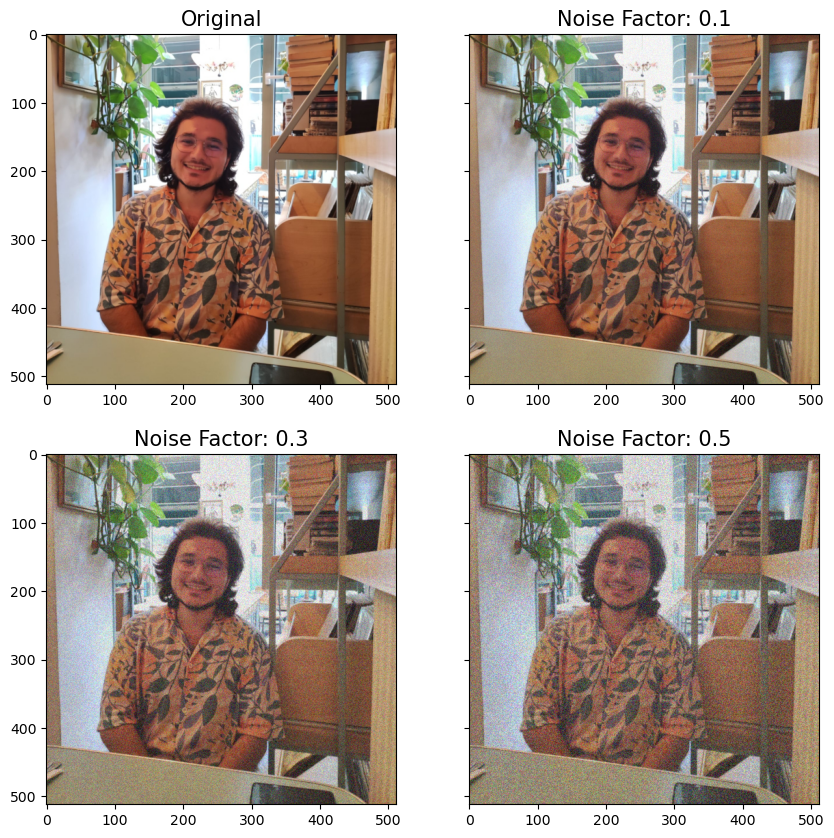

In [190]:
max_pixels = [np.max(image[:,:,0]), 
              np.max(image[:,:,1]), 
              np.max(image[:,:,2])]

np.random.seed(0)
noise = np.random.uniform(low = 0, high = 255, size = (512,512,3))

noisy_image1 = image + noise*0.1

noisy_image2 = image + noise*0.3

noisy_image3 = image + noise*0.5

noisy_image_rescaled1 = noisy_image1/noisy_image1.max()
noisy_image_rescaled2 = noisy_image2/noisy_image2.max()
noisy_image_rescaled3 = noisy_image3/noisy_image3.max()

fig, ax = plt.subplots(2, 2, figsize = (10,10), sharey = True)

ax[0,0].set_title("Original", fontsize = 15)
ax[0,0].imshow(image)

ax[0,1].set_title("Noise Factor: 0.1", fontsize = 15)
ax[0,1].imshow(noisy_image_rescaled1)

ax[1,0].set_title("Noise Factor: 0.3", fontsize = 15)
ax[1,0].imshow(noisy_image_rescaled2)

ax[1,1].set_title("Noise Factor: 0.5", fontsize = 15)
ax[1,1].imshow(noisy_image_rescaled3)

plt.show();

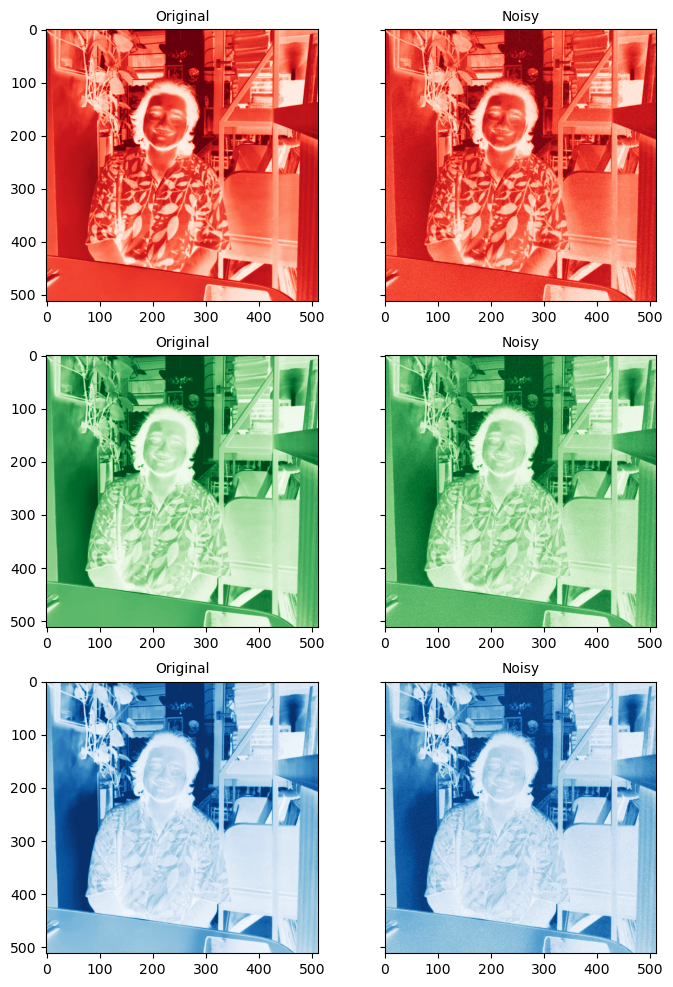

In [201]:
fig, ax = plt.subplots(3, 2, figsize = (8,12), sharey = True)

for i in range(3):
    for j in range(2):
        if j == 0:
            ax[i,j].set_title("Original", fontsize = 10)
            ax[i,j].imshow(image[:,:,i], cmap = colors[i])
        else:
            ax[i,j].set_title("Noisy", fontsize = 10)
            ax[i,j].imshow(noisy_image_rescaled1[:,:,i], cmap = colors[i])
plt.show();